In [2]:
# Biblotecas de manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Testes estatísticos
from scipy.stats import ttest_ind

# Bibliotecas Locais
from carga import *
from tratamentos import *
from categorizacao import *

pfEnade = doCarga('microdados_enade_2019.txt')

# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
pfEnade = doNota(pfEnade)
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
pfEnade = doHumanasExatas(pfEnade)
pfEnade = doRenda(pfEnade)

pfEnade = doMigracao(pfEnade)

# TRATAMENTOS - Dicionários
pfEnade = doRenda(pfEnade)
#pfEnade['Renda'].value_counts().sort_index()
# pfEnade.isna().sum()    # Mostra se há vazios
pfEnade = doEscolaridade(pfEnade)

In [ ]:
tmp = pfEnade.query('QE_I08 == " "')
tmp.head()

In [3]:
# Renda Familiar X Nota
tmp = pfEnade.groupby('QE_I08')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
tmp 

,mean,std,count
"Qual a renda total de sua família, incluindo seus rendimentos?",,,
Não Informado,35.316667,9.855438,6
"Até 1,5 salário mínimo (até R$ 1.431,00)",38.952305,16.183434,70974
"De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)",40.388231,16.128882,109810
"De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)",41.939163,16.592564,79438
"De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)",43.400706,16.908141,44614
"De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)",45.390344,17.258026,47357
"De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)",48.725288,17.422918,31149
"Acima de 30 salários mínimos (mais de R$ 28.620,00)",50.567785,17.580247,6320


In [ ]:
# Horas de Estudo X Renda Familiar
tmp = pfEnade.roupby('QE_I23')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doHEstudoDIC())
tmp.index.name = 'Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?'
tmp 

In [ ]:
# CORRELAÇÂO entre os grupos de horas de estudos
lista_de_listas = []
valores = sorted(pfEnade['QE_I23'].dropna().unique().tolist())
for i in valores:
    lista_de_listas.append([])
    for j in valores:
        t_res = ttest_ind(pfEnade.query(f'QE_I23 == @i')['NT_GER'], pfEnade.query(f'QE_I23 == @j')['NT_GER'])
        lista_de_listas[-1].append(t_res.pvalue)

valores = pd.Series(valores).replace(doHEstudoDIC())
tmp = pd.DataFrame(lista_de_listas, index=valores, columns=valores)    

sns.heatmap(tmp, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

In [4]:
# AGRUPANDO Renda X Horas de Estudo X Nota Média
tmp = pfEnade.groupby(['QE_I08', 'QE_I23'])['NT_GER'].agg(['mean']).unstack()
    
tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'

tmp.columns = tmp.columns.droplevel(0)
tmp.columns = pd.Series(tmp.columns).replace(doHEstudoDIC())
tmp.columns.name = 'Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?'
    
tmp 

"Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?",Não Informado,"Nenhuma, apenas assisto às aulas",De uma a três,De quatro a sete,De oito a doze,Mais de doze
"Qual a renda total de sua família, incluindo seus rendimentos?",,,,,,
Não Informado,19.600000,NaN,34.050000,38.700000,NaN,46.800000
"Até 1,5 salário mínimo (até R$ 1.431,00)",37.850000,32.668140,36.361033,39.918488,42.166205,44.167268
"De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)",57.500000,35.406836,37.937237,41.095607,43.497074,45.905880
"De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)",NaN,36.935132,39.227053,42.435215,45.273516,47.624296
"De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)",NaN,37.995846,40.513052,43.810162,46.303665,49.369638
"De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)",40.666667,38.781135,42.106601,45.846167,48.553826,50.886951
"De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)",NaN,41.430324,45.184693,48.662467,51.618629,53.896264
"Acima de 30 salários mínimos (mais de R$ 28.620,00)",NaN,43.341720,47.004090,49.736651,53.617310,55.049704


Text(0.05, 0.6, 'A : Até 1,5 salário mínimo (até R$ 1.431,00)\nB : De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)\nC : De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)\nD : De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)\nE : De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)\nF : De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)\nG : Acima de 30 salários mínimos (mais de R$ 28.620,00)\n  : Não Informado\n')

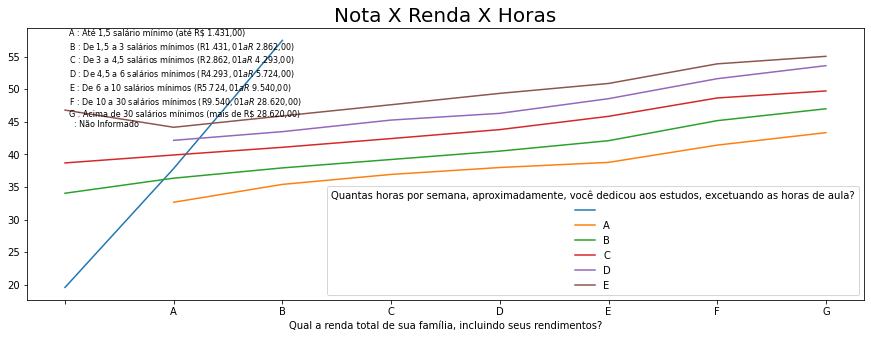

In [28]:
tmp = pfEnade.groupby(['QE_I08', 'QE_I23'])['NT_GER'].agg(['mean']).unstack() #.where(pfEnade.QE_I08 != ' ')
    
#tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'

tmp.columns = tmp.columns.droplevel(0)

#tmp.columns = pd.Series(tmp.columns).replace(doHEstudoDIC())
tmp.columns.name = 'Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?'
    
ax = tmp.plot(figsize=(15,5)) 
ax.set_title('Nota X Renda X Horas', fontsize=20)

textoRenda = ""
for key, value in doRendaDIC().items():
    textoRenda = textoRenda + "{k} : {v}\n".format(k=key, v=value)
ax.text(0.05, 0.6, textoRenda, transform=ax.transAxes, fontsize=8)


textoEstudo = ""
for key, value in doRendaDIC().items():
    textoEstudo = textoEstudo + "{k} : {v}\n".format(k=key, v=value)
ax.legend(textoEstudo)


In [ ]:
sns.heatmap(data=tmp, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), )

In [ ]:
# Gênero X Nota
tmp = pfEnade.groupby('TP_SEXO')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doSexoDIC())
tmp.index.name = 'Sexo'
tmp 

In [ ]:
# Gênero X Nota
tmp.div(tmp.iloc[1])

In [ ]:
# Sexo X Renda
SxR = pfEnade.groupby(['TP_SEXO', 'QE_I08'])['NT_GER'].agg(['count']).unstack()
    
SxR.index = pd.Series(SxR.index).replace(doSexoDIC())
SxR.index.name = 'Sexo'

SxR.columns = SxR.columns.droplevel(0)
SxR.columns = pd.Series(SxR.columns).replace(doRendaDIC())
SxR.columns.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
    
SxR 

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('Título Plot')
SxR.filter(items=['TP_SEXO', 'QE_I08', 'NT_GER'])\
    .groupby(['NT_GER', 'QE_I08'])\
    .mean().sort_values(by='NT_GER', ascending=False)\
    .unstack().plot(ax=ax)

In [ ]:
SxR.div(SxR.iloc[1])